<a href="https://colab.research.google.com/github/xhavien/CCADMACL_EXERCISES_COM222-ML/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

In [19]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn import datasets,metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import numpy as np
from sklearn.metrics import silhouette_score
import pandas as pd
from scipy.spatial import distance
from google.colab import files
from IPython.display import Image

housing = fetch_california_housing(as_frame=True)

In [20]:
target = housing.target
features = housing.data

In [21]:
features.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [22]:
features = housing.data[["Longitude", "Latitude"]]

In [23]:
df = pd.concat([features, target])
df

,Longitude,Latitude,MedHouseVal
0,-122.23,37.88,NaN
1,-122.22,37.86,NaN
2,-122.24,37.85,NaN
3,-122.25,37.85,NaN
4,-122.25,37.85,NaN
...,...,...,...
20635,NaN,NaN,0.781
20636,NaN,NaN,0.771
20637,NaN,NaN,0.923
20638,NaN,NaN,0.847


<Axes: xlabel='Longitude', ylabel='Latitude'>

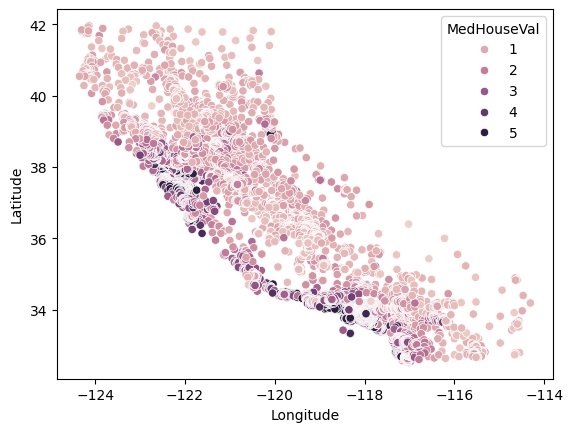

In [24]:
import seaborn as sns

sns.scatterplot(data = df, x = 'Longitude', y = 'Latitude', hue = 'MedHouseVal')

In [25]:
df['Latitude'].fillna(df['Latitude'].mean(), inplace=True)
df['Longitude'].fillna(df['Longitude'].mean(), inplace=True)

<ipython-input-25-bd68fb26486c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Latitude'].fillna(df['Latitude'].mean(), inplace=True)
<ipython-input-25-bd68fb26486c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['Latitude', 'Longitude']], df[['MedHouseVal']], test_size=0.33, random_state=0)

In [27]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [28]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, random_state=0)

<Axes: xlabel='Longitude', ylabel='Latitude'>

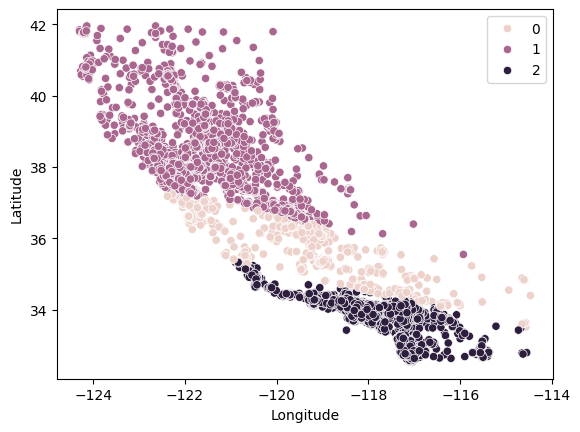

In [29]:
sns.scatterplot(data = X_train, x = 'Longitude', y = 'Latitude', hue = kmeans.labels_)

## Use the Elbow method to find the correct value of K

For cluster = 1, SSE/WCSS is 2.0690172605159725
For cluster = 2, SSE/WCSS is 0.8284273171163479
For cluster = 3, SSE/WCSS is 0.2896383867598299
For cluster = 4, SSE/WCSS is 0.132747199063285
For cluster = 5, SSE/WCSS is 0.08993069099852923
For cluster = 6, SSE/WCSS is 0.0546819256900248
For cluster = 7, SSE/WCSS is 0.04024303237480054
For cluster = 8, SSE/WCSS is 0.031246461538058726
For cluster = 9, SSE/WCSS is 0.025368883173397708
For cluster = 10, SSE/WCSS is 0.02021788410079479


Text(0, 0.5, 'WCSS')

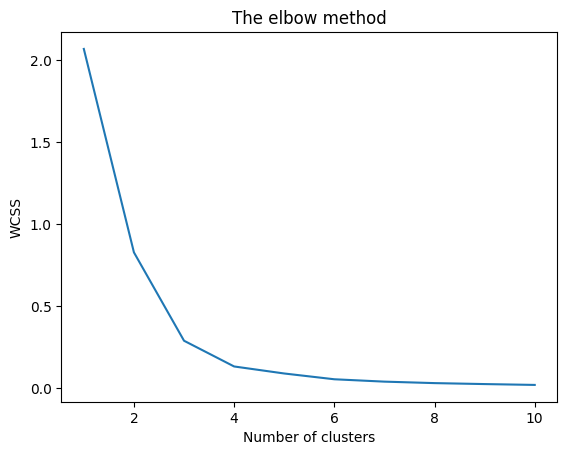

In [30]:
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
                    n_init = 10, random_state = 0)
    kmeans.fit(X_train_norm)
    wcss.append(kmeans.inertia_)
    print("For cluster = {}, SSE/WCSS is {}".format(i, kmeans.inertia_))

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [31]:
cluster_Kmeans = KMeans(n_clusters=4)
model_kmeans = cluster_Kmeans.fit(X_train)
pred_kmeans = model_kmeans.labels_
print(pred_kmeans)

# Frequency count of the Output clusters
unique, counts = np.unique(pred_kmeans, return_counts=True)
dict(zip(unique, counts))

[2 0 1 ... 0 0 2]


{0: 15021, 1: 4605, 2: 7360, 3: 671}

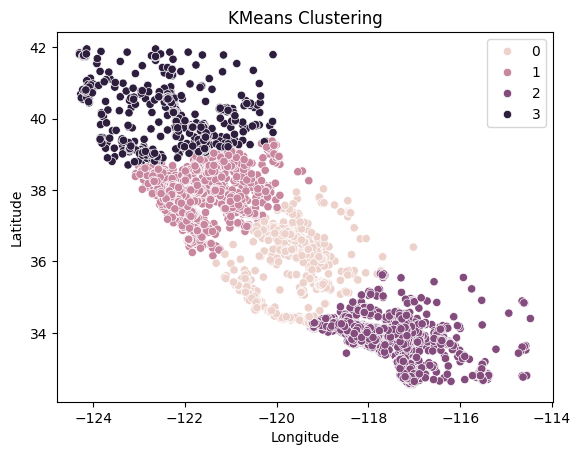

In [32]:
sns.scatterplot(data = X_train, x = 'Longitude', y = 'Latitude', hue = pred_kmeans)
plt.title("KMeans Clustering")
plt.show()